In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
# y = wx + b + e, w = [2, -3.4], b = 4.2
def synthetic_data(w, b, num_examples):
    # num_examples 个样本，每个样本的维度和 w 是一样的，每个属性都对应 w 中的一个权重
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    print(y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape, labels.shape)

torch.Size([1000])
torch.Size([1000, 2]) torch.Size([1000, 1])


In [3]:
# 一维的 matmul 就是点积，参考 https://pytorch.org/docs/stable/generated/torch.matmul.html
# https://blog.csdn.net/qsmx666/article/details/105783610
ex = torch.tensor([1.0, 2])
torch.matmul(ex, true_w)

tensor(-4.8000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.0555, 0.9824]) 
label: tensor([0.9730])


torch.Size([1000, 2]) torch.Size([1000])


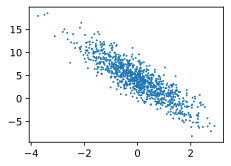

In [5]:
d2l.set_figsize()
print(features.shape, features[:,1].shape)
d2l.plt.scatter(features[:,1].numpy(), labels.numpy(), 1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # 最后一个 batch 可能不足 num_examples，不过影响不会很大
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X)
    print(y)
    break

tensor([[-0.1928, -0.7976],
        [-1.1340, -0.4173],
        [-1.1041, -0.2937],
        [ 0.7804,  0.4481],
        [ 0.8865, -1.1145],
        [ 0.9612, -0.1764],
        [-0.7011, -0.2910],
        [-0.8323,  0.5374],
        [ 0.2189,  0.2258],
        [-0.3321,  0.1579]])
tensor([[6.5256],
        [3.3520],
        [3.0071],
        [4.2516],
        [9.7457],
        [6.7185],
        [3.7781],
        [0.7144],
        [3.8520],
        [2.9859]])


In [12]:
# 正态分布初始化模型参数
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w.grad, b.grad)

None None


In [8]:
# 模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [16]:
# 损失函数
def square_loss(y_hat, y):
    return (y_hat - y) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            # 这里除以 batch_size 是因为在计算损失函数的时候没有除以 batch_size
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [17]:
lr = 0.1
num_epochs = 3
net = linreg
loss = square_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000051
epoch 3, loss 0.000052


In [21]:
print(f'w 的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b 的估计误差: {true_b - b}')

w 的估计误差: tensor([-0.0014,  0.0003], grad_fn=<SubBackward0>)
b 的估计误差: tensor([0.0010], grad_fn=<RsubBackward1>)
